# Crime Data

In [2]:
# Dependencies and Setup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from config import crime_key
import numpy as np
%matplotlib inline

# API endpoint and API key
base = 'https://api.usa.gov/crime/fbi/cde/'
query = 'arrest/national/all?from=2018&to=2021&API_KEY=' #National Arrests
key = crime_key 


In [3]:
# List of states to retrieve crime data for
states = ['CA', 'MI', 'TX', 'CO', 'NC', 'ME', 'MT', 'IA', 'OR', 'IL']
# API base
base_data = 'https://api.usa.gov/crime/fbi/cde/'
# Create empty dataframe to store crime data for all states
crime_df = pd.DataFrame(columns=['State', 'Year', 'Violent Crimes', 'Non-Violent Crimes', 'Total Crimes'])
# Loop through each state to retrieve data
for state in states:
    query = f'arrest/state/{state}/all?from=2018&to=2021&API_KEY='
    response = requests.get(base_data + query + crime_key)
    if response.status_code == 200:
        state_data = json.loads(response.content)['data']
    else:
        print(f"Error: API request for {state} failed with status code {response.status_code}")
        continue
    state_crime_df = pd.DataFrame(state_data)
    # Capture Year for each state
    state_crime_df = state_crime_df.rename(columns={'data_year': 'Year'})
    # Bin types of crime by Violent or Non-Violent
    state_crime_df['Violent Crimes'] = state_crime_df.loc[:, ['Aggravated Assault', 
                                                'Murder and Nonnegligent Manslaughter', 
                                                'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
    state_crime_df['Non-Violent Crimes'] = state_crime_df.loc[:, ['All Other Offenses (Except Traffic)', 'Arson', 
                                                'Burglary','Curfew and Loitering Law Violations', 'Disorderly Conduct',
                                                'Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                                'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud',
                                                'Gambling - Total', 'Human Trafficking - Commercial Sex Acts',
                                                'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
                                                'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                                'Offenses Against the Family and Children','Prostitution and Commercialized Vice',
                                                'Stolen Property: Buying, Receiving, Possessing',
                                                'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                                'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
    # Drop Types of Crimes
    state_crime_df.drop(labels=['Aggravated Assault','All Other Offenses (Except Traffic)', 'Arson', 'Burglary',
                                                'Curfew and Loitering Law Violations', 'Disorderly Conduct','Driving Under the Influence',
                                                'Drug Abuse Violations - Grand Total', 'Drunkenness', 'Embezzlement', 
                                                'Forgery and Counterfeiting', 'Fraud','Gambling - Total', 
                                                'Human Trafficking - Commercial Sex Acts', 'Human Trafficking - Involuntary Servitude',
                                                'Larceny - Theft', 'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                                'Murder and Nonnegligent Manslaughter', 'Offenses Against the Family and Children',
                                                'Prostitution and Commercialized Vice','Rape', 'Robbery', 'Simple Assault', 
                                                'Stolen Property: Buying, Receiving, Possessing', 'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                                'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)'],axis=1, inplace=True)
    # Add Violent and Non-Violent Crimes to create Total Crimes Column
    state_crime_df['Total Crimes'] = state_crime_df.loc[:, ['Non-Violent Crimes', 'Violent Crimes']].sum(axis=1)
    # Add State name
    state_crime_df['State'] = state
    # Plug in retrieved data to the all_crime_data_df
    crime_df = pd.concat([crime_df, state_crime_df[["State", "Year", "Violent Crimes", "Non-Violent Crimes", "Total Crimes"]]])
    crime_df
# Pivot the data to get the desired format
crime_pivot = crime_df.pivot_table(values=['Violent Crimes', 'Non-Violent Crimes', 'Total Crimes'], index=['State'], columns=['Year'], fill_value=0)
# Flatten the multi-level column index to get the desired format
crime_pivot.columns = ['{}_{}'.format(col[1], col[0]) for col in crime_pivot.columns]
# Reset the index to get the State column back
crime_pivot = crime_pivot.reset_index()
crime_pivot

,State,2018_Non-Violent Crimes,2019_Non-Violent Crimes,2020_Non-Violent Crimes,2021_Non-Violent Crimes,2018_Total Crimes,2019_Total Crimes,2020_Total Crimes,2021_Total Crimes,2018_Violent Crimes,2019_Violent Crimes,2020_Violent Crimes,2021_Violent Crimes
0,CA,901275,860307,678325,67223,1093323,1044775,847866,80110,192048,184468,169541,12887
1,CO,202936,188768,129247,129799,229840,215756,154544,154071,26904,26988,25297,24272
2,IA,76934,84491,67738,54885,87503,97884,80450,68332,10569,13393,12712,13447
3,IL,64391,6137,4196,28862,86606,8105,5616,38036,22215,1968,1420,9174
4,ME,35265,33568,27058,24068,40906,39053,32193,29062,5641,5485,5135,4994
5,MI,195441,173433,121423,117056,237605,215265,161334,155711,42164,41832,39911,38655
6,MT,23583,25276,23714,20331,29184,31365,30256,26907,5601,6089,6542,6576
7,NC,253224,203190,167286,193041,303471,236235,198996,225219,50247,33045,31710,32178
8,OR,122485,122944,85931,76285,139027,139945,100739,91156,16542,17001,14808,14871
9,TX,643861,563005,406638,413881,776182,676985,515112,525082,132321,113980,108474,111201


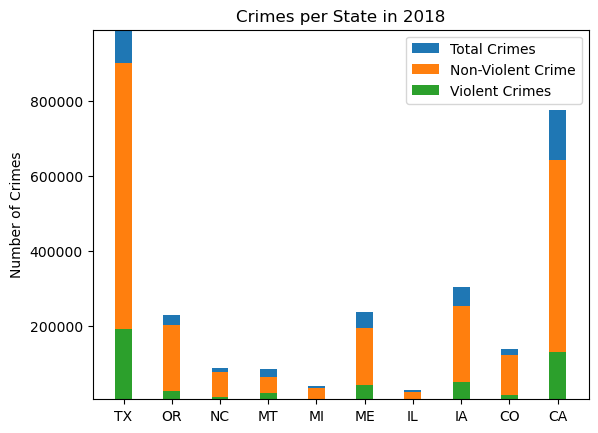

In [51]:
Total_Crime = [1093323,229840,87503,86606,40906,237605,29184,303471,139027,776182]
Non_Violent_Crime = [901275,202936,76934,64391,35265,195441,23583,253224,122485,643861]
Violent_Crime = [192048,26904,10569,22215,5641,42164,5601,50247,16542,132321]
labels = ['TX','OR','NC','MT','MI','ME','IL','IA','CO','CA']
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, Total_Crime, width, label="Total Crimes")
ax.bar(labels, Non_Violent_Crime, width, label="Non-Violent Crime")
ax.bar(labels, Violent_Crime, width, label="Violent Crimes")

ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes per State in 2018')
ax.set_ylim(5000,990000)
ax.legend()
plt.show()

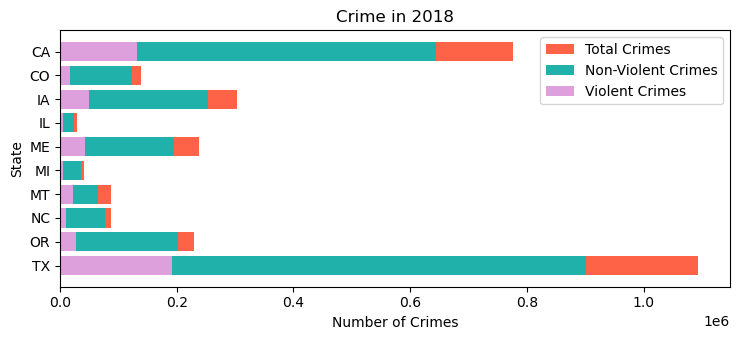

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

Total_Crime = [1093323,229840,87503,86606,40906,237605,29184,303471,139027,776182]
Non_Violent_Crime = [901275,202936,76934,64391,35265,195441,23583,253224,122485,643861]
Violent_Crime = [192048,26904,10569,22215,5641,42164,5601,50247,16542,132321]
labels = ['TX','OR','NC','MT','MI','ME','IL','IA','CO','CA']

b1 = plt.barh(labels, Total_Crime, color="tomato")
b2 = plt.barh(labels, Non_Violent_Crime, color="lightseagreen")
b3 = plt.barh(labels, Violent_Crime, color="plum")

plt.title("Crime in 2018")
plt.xlabel("Number of Crimes")
plt.ylabel("State")
plt.legend([b1,b2,b3], ["Total Crimes", "Non-Violent Crimes", "Violent Crimes"], loc="upper right")

plt.show()
